In [2]:
import numpy as np
from sedpy.observate import load_filters
from prospect.io import read_results as pread
import matplotlib.pyplot as plt
import tqdm
import glob
import pandas as pd

import matplotlib
matplotlib.rcParams.update({
    "savefig.facecolor": "w",
    "figure.facecolor" : 'w',
    "figure.figsize" : (10,8),
    "text.color": "k",
    "legend.fontsize" : 20,
    "font.size" : 30,
    "axes.edgecolor": "k",
    "axes.labelcolor": "k",
    "axes.linewidth": 3,
    "xtick.color": "k",
    "ytick.color": "k",
    "xtick.labelsize" : 25,
    "ytick.labelsize" : 25,
    "ytick.major.size" : 12,
    "xtick.major.size" : 12,
    "ytick.major.width" : 2,
    "xtick.major.width" : 2,
    "font.family": "Times",
    "mathtext.fontset" : "cm"
})

savedir = '/Users/sidneylower/Documents/atten_demos/simba_attenuation_analysis/'

In [7]:
data = pd.read_pickle('/Volumes/orange/narayanan/s.lower/prospector/simba_runs/demo_run/prospector_output.pkl')

In [8]:
data

,SFR_50,SFR_16,SFR_84,mass_84,mass_16,mass_50,True Mass,Massfrac50,Z_50,Z_16,Z_84
10,"[0.11006390023302653, 0.06213083281764166, 0.0...","[0.054971616422613924, 0.023587290864532377, 0...","[0.17961488383032645, 0.12092550206669438, 0.1...",10.090587,8.225505,9.195570,10.853479,0.609612,-1.525751,-1.681694,-0.722632
11,"[0.17594221464194953, 0.2500968977657139, 0.52...","[0.054139325889436436, 0.09826449672439466, 0....","[0.42880968917953466, 0.4663172924846263, 1.05...",11.581373,8.267549,9.662182,11.213063,0.606633,-0.277659,-0.489414,0.004859
12,"[0.08725739928078625, 0.03950932452416956, 0.0...","[0.03428872690221663, 0.01207372332280254, 0.0...","[0.14821691861431613, 0.09841616627855254, 0.1...",10.057987,8.291699,9.056228,11.050204,0.605745,-1.661433,-1.833463,-0.732022
13,"[6.428487518971422, 12.014762004924284, 16.928...","[1.8188048933422547, 5.616021583143686, 5.3894...","[15.755891432178165, 18.758643939672336, 29.23...",12.041304,9.405444,11.232471,11.187057,0.608001,-0.209165,-0.337236,0.020391
14,"[0.8471703456065596, 1.4296429645785027, 1.626...","[0.2879844206488391, 0.5631583150088728, 0.602...","[2.081322574508858, 2.4085930403913176, 3.0641...",11.786975,8.484909,10.301974,11.184853,0.606854,-0.247279,-0.386727,0.006603
...,...,...,...,...,...,...,...,...,...,...,...
95,"[7.756130149098963, 12.576725518794305, 13.396...","[2.6371677209171134, 5.218906849828684, 3.9874...","[17.792428772828934, 19.743846929558636, 25.34...",11.889001,10.144686,11.247249,10.691260,0.608223,-0.243837,-0.443679,0.008484
96,"[0.07043845321416194, 0.04374029139322951, 0.0...","[0.024356925474428116, 0.017198943474313215, 0...","[0.1458068037633201, 0.08997374699900187, 0.09...",9.856197,8.268032,8.932526,10.179345,0.601464,-1.652557,-1.863249,-0.765053
97,"[0.10057546277881471, 0.1705729714169387, 0.14...","[0.042146930415673564, 0.07911298364476906, 0....","[0.29759828569784935, 0.2686186178855363, 0.28...",10.423944,8.584913,9.396684,10.598428,0.605043,-0.740593,-0.909042,-0.366399
98,"[0.04313774905023605, 0.03812410425489126, 0.0...","[0.0195228810876603, 0.017341065856455944, 0.0...","[0.07679688506352823, 0.05997769888351108, 0.0...",9.826873,7.989263,8.827193,10.393626,0.606527,-1.723638,-1.832256,-0.839630


In [14]:
mass50 = np.log10(10**data['mass_50'] * data['Massfrac50'])

In [15]:
len(mass50), len(data['True Mass'])

(89, 89)

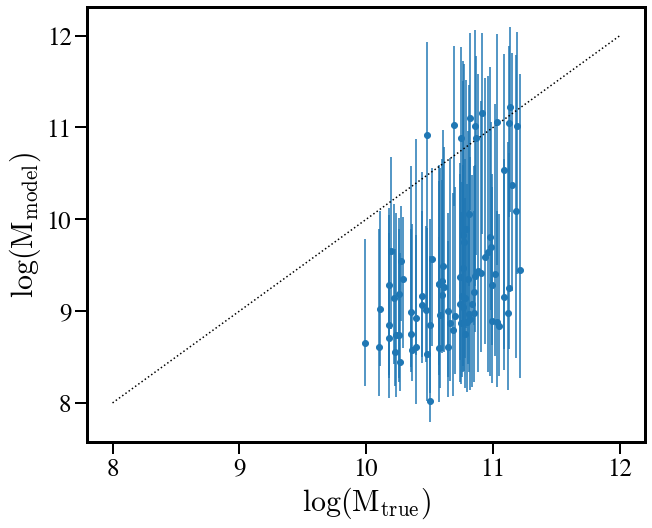

In [38]:
plt.errorbar(data['True Mass'], mass50, 
             yerr=[(mass50 - data['mass_16']), (data['mass_84'] - mass50)], ls='None', marker='o')
plt.plot([8, 12], [8, 12], color='black', ls=':')
plt.ylabel('$\log(\mathrm{M_{model}})$')
plt.xlabel('$\log(\mathrm{M_{true}})$')
plt.savefig(savedir+'/masses.png', dpi=300, bbox_inches='tight')

In [34]:
res, _, _ = pread.results_from('/Volumes//orange/narayanan/s.lower/prospector/simba_runs/demo_run/galaxy_51.h5')

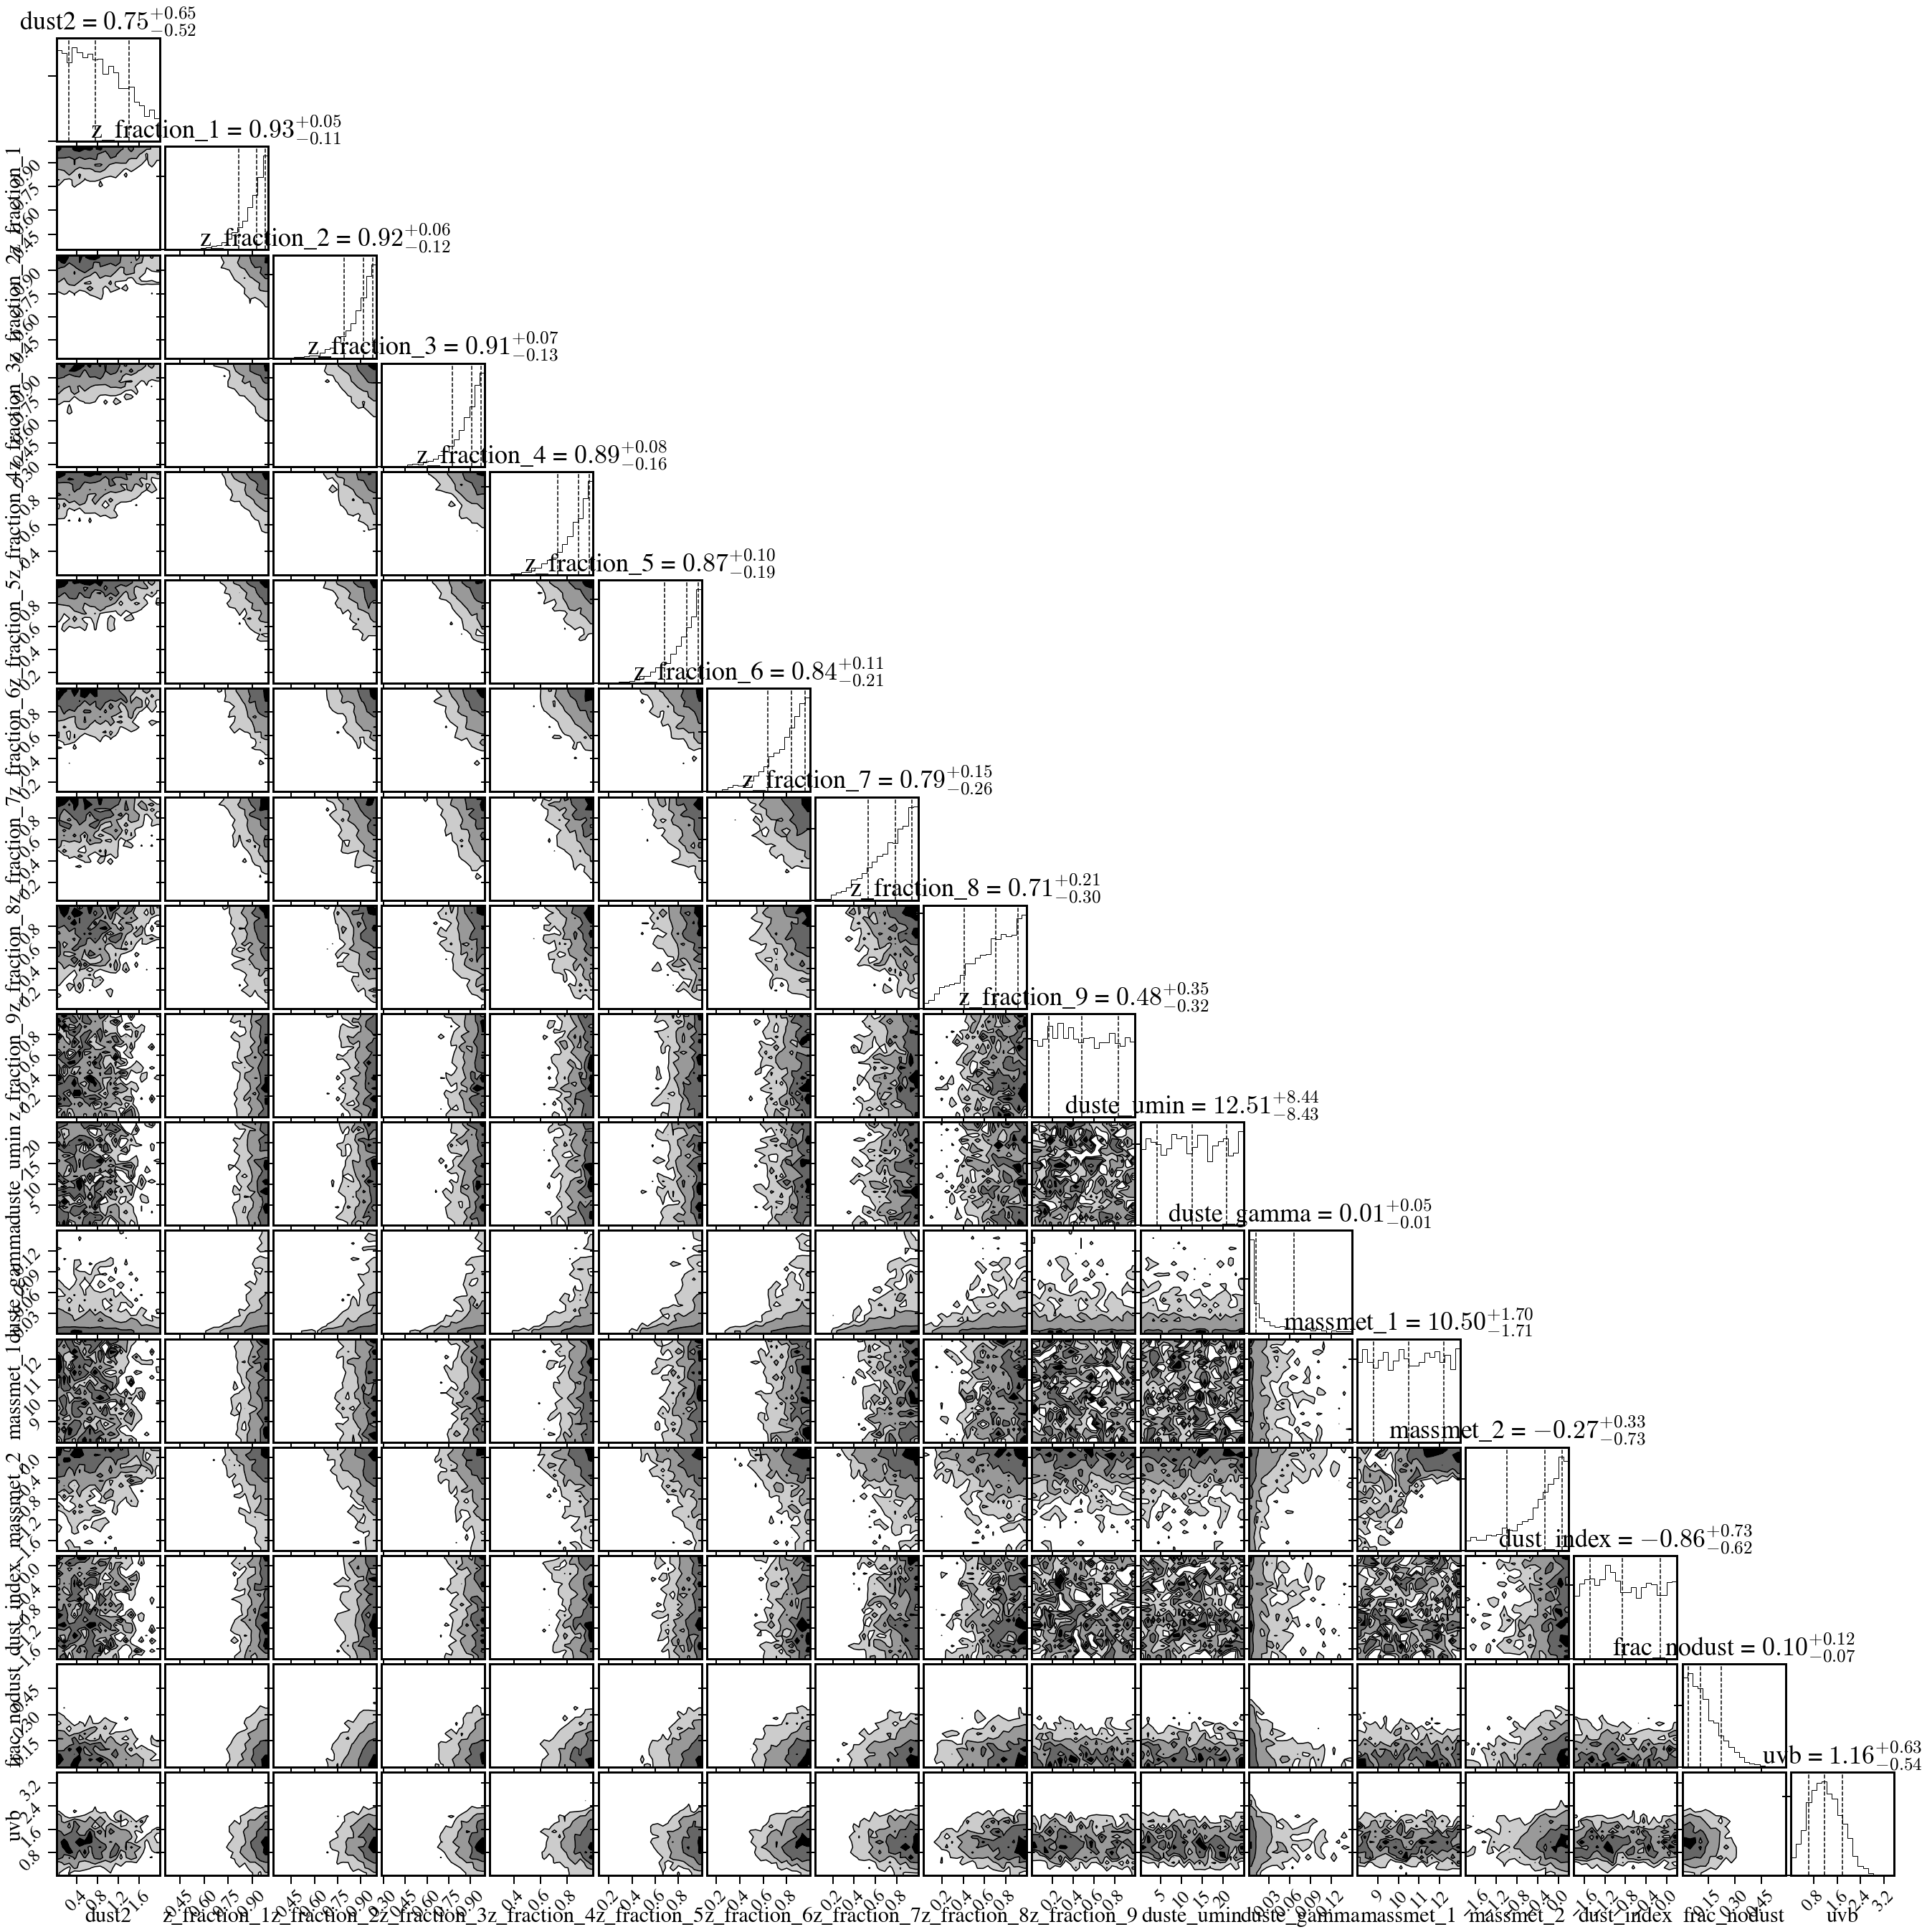

In [36]:
fig = pread.subcorner(res)

In [37]:
fig.savefig(savedir+'galaxy_51_corner.png', dpi=300, bbox_inches='tight')